In [26]:
from deep_translator import GoogleTranslator
import emot
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas_profiling import ProfileReport
import re
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [3]:
customers_df = pd.read_csv("olist_customers_dataset.csv")
geolocation_df = pd.read_csv("olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("olist_order_items_dataset.csv")
order_payments_df = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("olist_orders_dataset.csv")
products_df = pd.read_csv("olist_products_dataset.csv")
sellers_df = pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation_df = pd.read_csv(
    "product_category_name_translation.csv"
)
order_items_df["shipping_limit_date"] = pd.to_datetime(
    order_items_df["shipping_limit_date"]
)
order_reviews_df[
    ["review_creation_date", "review_answer_timestamp"]
] = order_reviews_df[["review_creation_date", "review_answer_timestamp"]].apply(
    pd.to_datetime, errors="coerce"
)
orders_df[
    [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ]
] = orders_df[
    [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ]
].apply(
    pd.to_datetime, errors="coerce"
)


for df in [
    customers_df,
    geolocation_df,
    order_items_df,
    order_payments_df,
    order_reviews_df,
    orders_df,
    products_df,
    sellers_df,
    product_category_name_translation_df,
]:
    display(df)


customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  
0      2017-09-19 09:45:35   58.90          13.29  
1      2017-05-03 11:05:13  239.90          19.93  
2      2018-01-18 14:48:30  199.00          17.87  
3      2018-08-15 10:10:18   12.99          12.79  
4      2017-02-13 13:57:51  199.90          18.14  
...                    ...     ...            ...  
112645 2018-05-02 04:11:01  299.99          43.41  
112646 2018-07-20 04:31:48  350.00          36.53  
112647 2017-10-30 17:14:25   99.90          16.95  
112648 2017-08-21 00:04:32   55.99           8.72  
112649 2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN           2018-01-18   
1                                                    NaN           2018-03-10   
2                                                    NaN           2018-02-17   
3                  Recebi bem antes do prazo estipulado.           2017-04-21   
4      Parabéns lojas lannister adorei comprar pela I...           2018-03-01   
...                                                  ...                  ...   
99219                                                NaN           2018-07-07   
99220                                                NaN           2017-12-09   
99221  Excelente mochila, entrega super rápida. Super...           2018-03-22   
99222                                                NaN           2018-07-01   
99223  meu produto chegou e ja tenho que devolver, po...           2017-07-03   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99436    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0                        2017-10-18  
1                        2018-08-13  
2                        2018-09-04  
3                        2017-12-15  
4                        2018-02-26  
...                             ...  
99436                    2017-03-28  
99437                    2018-03-02  
99438                    2017-09-27  
99439                    2018-02-15  
99440                    2018-04-03  

[99441 rows x 8 columns]

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [4]:
translator = GoogleTranslator(source="pt", target="en")
emot_object = emot.core.emot()
lead_trail_space = re.compile(r"^(\s*)(.+?)(\s*)$")
sentiment = SentimentIntensityAnalyzer()


def translate_comment(original_string):
    if not isinstance(original_string, str):
        return original_string

    emoji = emot_object.emoji(original_string)
    emoticons = emot_object.emoticons(original_string)
    all_emotes = [
        [emoji["value"][i], emoji["location"][i]] for i in range(len(emoji["value"]))
    ] + [
        [emoticons["value"][i], emoticons["location"][i]]
        for i in range(len(emoticons["value"]))
    ]

    if len(all_emotes) > 0:
        translated_string_list = []
        current_index = 0

        all_emotes.sort(key=lambda x: x[1][0])
    
        for emote in all_emotes:
            pre_emote = original_string[current_index : emote[1][0]]

            if re.search(r"[a-zA-Zà-üÀ-Ü]", pre_emote):
                lead_trail_space_match = lead_trail_space.match(pre_emote)

                if lead_trail_space_match is not None:
                    translated_string_list += [
                        lead_trail_space_match.group(1)
                        + translator.translate(lead_trail_space_match.group(2))
                        + lead_trail_space_match.group(3)
                    ]
                else:
                    translated_string_list += [pre_emote]
            else:
                translated_string_list += [pre_emote]

            translated_string_list += [emote[0]]

            current_index = emote[1][1]

            if emote == all_emotes[-1]:
                post_emote = original_string[current_index:]

                if re.search(r"[a-zA-Zà-üÀ-Ü]", post_emote):
                    lead_trail_space_match = lead_trail_space.match(post_emote)

                    if lead_trail_space_match is not None:
                        translated_string_list += [
                            lead_trail_space_match.group(1)
                            + translator.translate(lead_trail_space_match.group(2))
                            + lead_trail_space_match.group(3)
                        ]
                    else:
                        translated_string_list += [post_emote]
                else:
                    translated_string_list += [post_emote]

        return "".join(translated_string_list)
    else:
        if re.search(r"[a-zA-Zà-üÀ-Ü]", original_string):
            return translator.translate(original_string)
        else:
            return original_string
        


def generate_comment_score(title, message):
    if isinstance(title, str):
        title_score = int(
            round((sentiment.polarity_scores(title)["compound"] + 1) * 2.5, 0)
        )
        if isinstance(message, str):
            message_score = int(
                round((sentiment.polarity_scores(message)["compound"] + 1) * 2.5, 0)
            )
            score = int(round((title_score + message_score) / 2, 0))
        else:
            score = title_score
    else:
        score = int(
            round((sentiment.polarity_scores(message)["compound"] + 1) * 2.5, 0)
        )

    return 1 if score == 0 else score


In [5]:
if not os.path.isfile("review_comments_df.ftr"):
    review_comments_df = order_reviews_df.loc[
        ~order_reviews_df["review_comment_title"].isna()
        | ~order_reviews_df["review_comment_message"].isna()
    ][["review_score", "review_comment_title", "review_comment_message"]]
    review_comments_df["review_comment_score"] = 0
    review_comments_df["review_comment_title"] = review_comments_df.apply(
        lambda row: translate_comment(row["review_comment_title"]), axis=1
    )
    review_comments_df["review_comment_message"] = review_comments_df.apply(
        lambda row: translate_comment(row["review_comment_message"]), axis=1
    )
    review_comments_df["review_comment_score"] = review_comments_df.apply(
        lambda row: generate_comment_score(
            row["review_comment_title"], row["review_comment_message"]
        ),
        axis=1,
    )
    review_comments_df = review_comments_df.reset_index()

    review_comments_df.to_feather("review_comments_df.ftr")
else:
    review_comments_df = pd.read_feather("review_comments_df.ftr")

review_comments_df = review_comments_df.set_index("index")
review_comments_df.index.name = None

display(review_comments_df)


review_score review_comment_title  \
3                 5                 None   
4                 5                 None   
9                 4          I recommend   
12                4                 None   
15                5     highly recommend   
...             ...                  ...   
99205             4                 None   
99208             5                 None   
99215             3                 None   
99221             5                 None   
99223             1                 None   

                                  review_comment_message  review_comment_score  
3         I received it well before the stipulated time.                     3  
4      Congratulations Lannister stores I loved shopp...                     5  
9      efficient device. on the website the brand of ...                     4  
12     But a little slowing down... for the price it'...                     4  
15     Reliable seller, ok product and delivery on time.                     4  
...                                                  ...                   ...  
99205  for this product I received according to the p...                     2  
99208  Delivered within the time frame. The product a...                     4  
99215  The product was not sent with an invoice, ther...                     3  
99221  Excellent backpack, super fast delivery. I hig...                     5  
99223  My product arrived and I already have to retur...                     1  

[42706 rows x 4 columns]

Correlation between review and comment scores: 0.6072365358340254


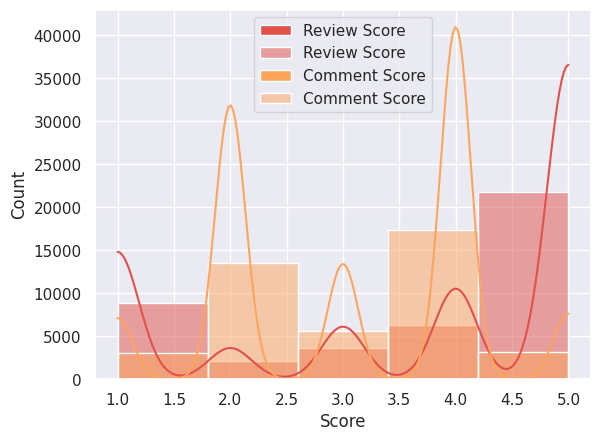

In [6]:
print(
    f"Correlation between review and comment scores: {review_comments_df['review_score'].corr(review_comments_df['review_comment_score'])}"
)
sns.set(style="darkgrid")
sns.set_palette("Spectral")
sns.histplot(
    data=review_comments_df, x="review_score", bins=5, label="Review Score", kde=True
)
sns.histplot(
    data=review_comments_df,
    x="review_comment_score",
    bins=5,
    label="Comment Score",
    kde=True,
)
plt.xlabel("Score")
plt.legend()
plt.show()


In [7]:
def update_review_table(index, title, message, comment_score):
    order_reviews_df.loc[
        index,
        ["review_comment_title", "review_comment_message", "review_comment_score"],
    ] = [title, message, comment_score]


order_reviews_df["review_comment_score"] = None

review_comments_df.apply(
    lambda row: update_review_table(
        row.name,
        row["review_comment_title"],
        row["review_comment_message"],
        row["review_comment_score"],
    ),
    axis=1,
)
display(order_reviews_df)


review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                 None   
4                 5                 None   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                 None   
99222             4                  NaN   
99223             1                 None   

                                  review_comment_message review_creation_date  \
0                                                    NaN           2018-01-18   
1                                                    NaN           2018-03-10   
2                                                    NaN           2018-02-17   
3         I received it well before the stipulated time.           2017-04-21   
4      Congratulations Lannister stores I loved shopp...           2018-03-01   
...                                                  ...                  ...   
99219                                                NaN           2018-07-07   
99220                                                NaN           2017-12-09   
99221  Excellent backpack, super fast delivery. I hig...           2018-03-22   
99222                                                NaN           2018-07-01   
99223  My product arrived and I already have to retur...           2017-07-03   

      review_answer_timestamp review_comment_score  
0         2018-01-18 21:46:59                 None  
1         2018-03-11 03:05:13                 None  
2         2018-02-18 14:36:24                 None  
3         2017-04-21 22:02:06                    3  
4         2018-03-02 10:26:53                    5  
...                       ...                  ...  
99219     2018-07-14 17:18:30                 None  
99220     2017-12-11 20:06:42                 None  
99221     2018-03-23 09:10:43                    5  
99222     2018-07-02 12:59:13                 None  
99223     2017-07-03 21:01:49                    1  

[99224 rows x 8 columns]

In [8]:
for miss_transl in [
    x
    for x in products_df["product_category_name"].unique()
    if x not in product_category_name_translation_df["product_category_name"].to_list()
    and isinstance(x, str)
]:
    product_category_name_translation_df = pd.concat(
        [
            pd.DataFrame(
                {
                    "product_category_name": miss_transl,
                    "product_category_name_english": translator.translate(miss_transl),
                },
                index=[0],
            ),
            product_category_name_translation_df.loc[:],
        ]
    ).reset_index(drop=True)

product_category_name_translation_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          73 non-null     object
 1   product_category_name_english  73 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [9]:
product_sales_df = (
    pd.DataFrame(
        {
            "order_id": order_items_df["order_id"],
            "order_item_id": order_items_df["order_item_id"],
            "product_id": order_items_df["product_id"],
            "price": order_items_df["price"],
            "freight_value": order_items_df["freight_value"],
        }
    )
    .merge(
        products_df.merge(
            product_category_name_translation_df,
            on="product_category_name",
            how="outer",
        )[["product_id", "product_category_name_english"]],
        on="product_id",
    )
    .merge(
        orders_df[["order_id", "customer_id", "order_purchase_timestamp"]],
        on="order_id",
    )
    .merge(
        customers_df[["customer_id", "customer_unique_id", "customer_zip_code_prefix"]],
        on="customer_id",
    )
    .merge(
        order_reviews_df[["order_id", "review_score", "review_comment_score"]],
        on="order_id",
    )
    .drop("customer_id", axis=1)
    .drop_duplicates()[
        [
            "order_id",
            "order_item_id",
            "product_id",
            "product_category_name_english",
            "price",
            "freight_value",
            "customer_unique_id",
            "customer_zip_code_prefix",
            "review_score",
            "review_comment_score",
            "order_purchase_timestamp",
        ]
    ]
)

display(product_sales_df)
product_sales_df.info()

product_sales_df = product_sales_df.reset_index()

product_sales_df.to_feather("product_sales_df.ftr")


order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
112367  ffebd80e3291e811c308365936897efd              1   
112368  ffee31fb4b5e35c9123608015637c495              1   
112369  fff7c4452f050315db1b3f24d9df5fcd              1   
112370  fffa82886406ccf10c7b4e35c4ff2788              1   
112371  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id product_category_name_english  price  \
0       4244733e06e7ecb4970a6e2683c13e61                    cool_stuff   58.9   
1       4244733e06e7ecb4970a6e2683c13e61                    cool_stuff   55.9   
2       4244733e06e7ecb4970a6e2683c13e61                    cool_stuff   64.9   
3       4244733e06e7ecb4970a6e2683c13e61                    cool_stuff   58.9   
4       4244733e06e7ecb4970a6e2683c13e61                    cool_stuff   58.9   
...                                  ...                           ...    ...   
112367  4cc4d02efc8f249c13355147fb44e34d                  garden_tools  129.9   
112368  b10ecf8e33aaaea419a9fa860ea80fb5               furniture_decor   99.0   
112369  dd469c03ad67e201bc2179ef077dcd48                 watches_gifts  736.0   
112370  bbe7651fef80287a816ead73f065fc4b                sports_leisure  229.9   
112371  350688d9dc1e75ff97be326363655e01                bed_bath_table   43.0   

        freight_value                customer_unique_id  \
0               13.29  871766c5855e863f6eccc05f988b23cb   
1               17.96  0fb8e3eab2d3e79d92bb3fffbb97f188   
2               18.33  3419052c8c6b45daf79c1e426f9e9bcb   
3               16.17  e7c828d22c0682c1565252deefbe334d   
4               13.29  0bb98ba72dcc08e95f9d8cc434e9a2cc   
...               ...                               ...   
112367          51.20  a1c2e4b4c1b29e41684ebdf3cc6538f8   
112368          13.52  4e15fee963523774998876e3624952f4   
112369          20.91  c86ab5ff2bac777c4e770a383feca4eb   
112370          44.02  2a3ab9bf9639491997586882c502540a   
112371          12.79  cd76a00d8e3ca5e6ab9ed9ecb6667ac4   

        customer_zip_code_prefix  review_score review_comment_score  \
0                          28013             5                    4   
1                          75800             5                    4   
2                          30720             4                    4   
3                          83070             5                 None   
4                          36400             5                 None   
...                          ...           ...                  ...   
112367                     28740             5                 None   
112368                     83065             4                 None   
112369                     27261             5                 None   
112370                     59955             4                 None   
112371                     18605             5                 None   

       order_purchase_timestamp  
0           2017-09-13 08:59:02  
1           2017-06-28 11:52:20  
2           2018-05-18 10:25:53  
3           2017-08-01 18:38:42  
4           2017-08-10 21:48:40  
...                         ...  
112367      2018-07-13 20:04:05  
112368      2018-08-18 10:00:59  
112369      2017-06-01 16:53:03  
112370      2017-12-18 16:33:07  
112371      2018-06-09 17:00:18  

[112050 rows x 11 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112050 entries, 0 to 112371
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112050 non-null  object        
 1   order_item_id                  112050 non-null  int64         
 2   product_id                     112050 non-null  object        
 3   product_category_name_english  110456 non-null  object        
 4   price                          112050 non-null  float64       
 5   freight_value                  112050 non-null  float64       
 6   customer_unique_id             112050 non-null  object        
 7   customer_zip_code_prefix       112050 non-null  int64         
 8   review_score                   112050 non-null  int64         
 9   review_comment_score           49473 non-null   object        
 10  order_purchase_timestamp       112050 non-null  datetime64[ns]
dtype

In [10]:
profile = ProfileReport(product_sales_df, html={"style": {"full_width": True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
compl_orders_df = orders_df.loc[orders_df["order_status"] == "delivered"]


def get_customer_behav_stats(customer_unique_id):
    order_ids = compl_orders_df[
        compl_orders_df["customer_id"].isin(
            customers_df.loc[customers_df["customer_unique_id"] == customer_unique_id][
                "customer_id"
            ].to_list()
        )
    ]["order_id"].to_list()
    total_orders = len(order_ids)
    total_prods_ordered = order_items_df[
        order_items_df["order_id"].isin(order_ids)
    ].shape[0]
    customer_reviews = order_reviews_df[order_reviews_df["order_id"].isin(order_ids)][
        ["review_score", "review_creation_date"]
    ]
    num_reviews = customer_reviews.shape[0]

    if customer_reviews.shape[0] > 0:
        first_customer_review_score = customer_reviews.iloc[
            customer_reviews["review_creation_date"].argmin()
        ]["review_score"]
        avg_customer_review_score = customer_reviews["review_score"].mean()
    else:
        first_customer_review_score = None
        avg_customer_review_score = None

    return [
        total_orders,
        total_prods_ordered,
        first_customer_review_score,
        avg_customer_review_score,
    ]


if not os.path.isfile("customer_behav_df.ftr"):
    # cust_uniq_id_val_cnts = customers_df["customer_unique_id"].value_counts()
    customer_behav_df = pd.DataFrame(
        {
            "customer_unique_id": customers_df["customer_unique_id"].unique(),
            # "customer_unique_id": cust_uniq_id_val_cnts.index,
            # "total_orders": cust_uniq_id_val_cnts.to_list(),
        }
    )
    (
        customer_behav_df["total_orders"],
        customer_behav_df["total_prods_ordered"],
        customer_behav_df["first_customer_review_score"],
        customer_behav_df["avg_customer_review_score"],
    ) = zip(*customer_behav_df["customer_unique_id"].map(get_customer_behav_stats))
    customer_behav_df = customer_behav_df[
        customer_behav_df["total_orders"] != 0
    ].reset_index()

    customer_behav_df.to_feather("customer_behav_df.ftr")
else:
    customer_behav_df = pd.read_feather("customer_behav_df.ftr")
    customer_behav_df = customer_behav_df.set_index("index")
    customer_behav_df.index.name = None

display(customer_behav_df)


customer_unique_id  total_orders  total_prods_ordered  \
0      861eff4711a542e4b93843c6dd7febb0             1                    1   
1      290c77bc529b7ac935b93aa66c333dc3             1                    1   
2      060e732b5b29e8181a18229c7b0b2b5e             1                    1   
3      259dac757896d24d7702b9acbbff3f3c             1                    1   
4      345ecd01c38d18a9036ed96c73b8d066             1                    1   
...                                 ...           ...                  ...   
93353  1a29b476fee25c95fbafc67c5ac95cf8             1                    1   
93354  d52a67c98be1cf6a5c84435bd38d095d             1                    1   
93355  e9f50caf99f032f0bf3c55141f019d99             1                    1   
93356  73c2643a0a458b49f58cea58833b192e             1                    1   
93357  84732c5050c01db9b23e19ba39899398             1                    1   

       first_customer_review_score  avg_customer_review_score  
0                              4.0                        4.0  
1                              5.0                        5.0  
2                              5.0                        5.0  
3                              5.0                        5.0  
4                              5.0                        5.0  
...                            ...                        ...  
93353                          4.0                        4.0  
93354                          5.0                        5.0  
93355                          1.0                        1.0  
93356                          5.0                        5.0  
93357                          5.0                        5.0  

[93358 rows x 5 columns]

In [12]:
profile = ProfileReport(customer_behav_df, html={"style": {"full_width": True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
num_total_orders = [x for x in range(1, customer_behav_df["total_orders"].max() + 1)]
reviews_by_total_orders_df = pd.DataFrame(
    {
        "Total Orders": num_total_orders,
        "First Review Score Mean": np.nan_to_num(
            [
                customer_behav_df.loc[customer_behav_df["total_orders"] == x][
                    "first_customer_review_score"
                ].mean()
                for x in num_total_orders
            ]
        ).tolist(),
        "Average Review Score Mean": np.nan_to_num(
            [
                customer_behav_df.loc[customer_behav_df["total_orders"] == x][
                    "avg_customer_review_score"
                ].mean()
                for x in num_total_orders
            ]
        ).tolist(),
    }
)
num_prods_ordered = [
    x for x in range(1, customer_behav_df["total_prods_ordered"].max() + 1)
]
reviews_by_prods_ordered_df = pd.DataFrame(
    {
        "Total Products Ordered": num_prods_ordered,
        "First Review Score Mean": np.nan_to_num(
            [
                customer_behav_df.loc[customer_behav_df["total_prods_ordered"] == x][
                    "first_customer_review_score"
                ].mean()
                for x in num_prods_ordered
            ]
        ).tolist(),
        "Average Review Score Mean": np.nan_to_num(
            [
                customer_behav_df.loc[customer_behav_df["total_prods_ordered"] == x][
                    "avg_customer_review_score"
                ].mean()
                for x in num_prods_ordered
            ]
        ).tolist(),
    }
)

display(reviews_by_total_orders_df)
display(reviews_by_prods_ordered_df)


Total Orders  First Review Score Mean  Average Review Score Mean
0              1                 4.152240                   4.152029
1              2                 4.194618                   4.190393
2              3                 4.370166                   4.369705
3              4                 4.392857                   4.448214
4              5                 4.666667                   4.304762
5              6                 4.800000                   4.671429
6              7                 5.000000                   5.000000
7              8                 0.000000                   0.000000
8              9                 2.000000                   2.777778
9             10                 0.000000                   0.000000
10            11                 0.000000                   0.000000
11            12                 0.000000                   0.000000
12            13                 0.000000                   0.000000
13            14                 0.000000                   0.000000
14            15                 5.000000                   5.000000

Total Products Ordered  First Review Score Mean  Average Review Score Mean
0                        1                 4.209812                   4.209572
1                        2                 3.807428                   3.806816
2                        3                 3.682209                   3.682587
3                        4                 3.490228                   3.476059
4                        5                 3.715481                   3.702411
5                        6                 3.470270                   3.445045
6                        7                 3.400000                   3.485714
7                        8                 3.812500                   3.776042
8                        9                 3.500000                   3.600000
9                       10                 2.363636                   2.469697
10                      11                 3.272727                   3.272727
11                      12                 3.111111                   3.444444
12                      13                 2.000000                   2.000000
13                      14                 1.333333                   1.592593
14                      15                 4.333333                   4.333333
15                      16                 0.000000                   0.000000
16                      17                 0.000000                   0.000000
17                      18                 5.000000                   5.000000
18                      19                 0.000000                   0.000000
19                      20                 1.000000                   1.000000
20                      21                 1.000000                   1.000000
21                      22                 0.000000                   0.000000
22                      23                 0.000000                   0.000000
23                      24                 4.000000                   4.000000

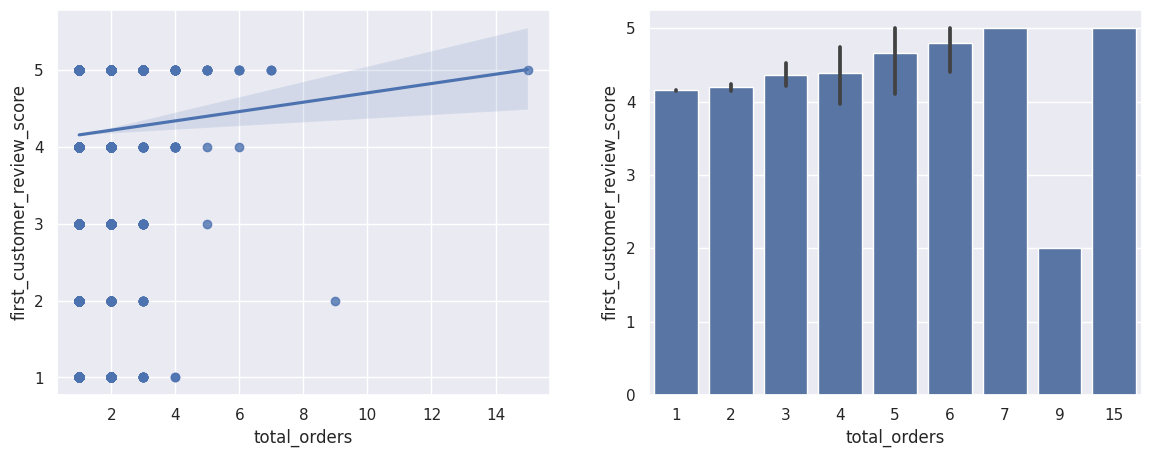

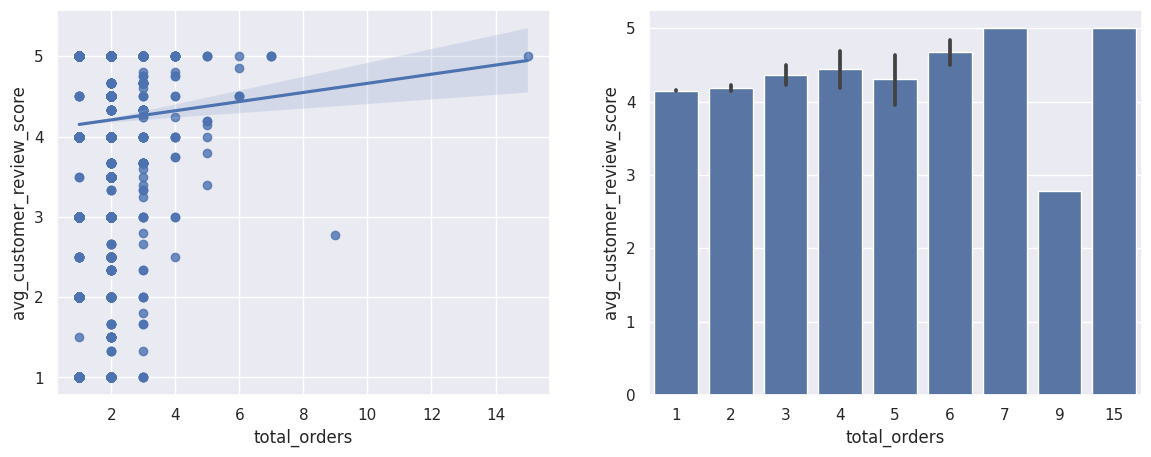

/home/gabriel/OC_DS_Projects/OC_DS_P5/venv/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


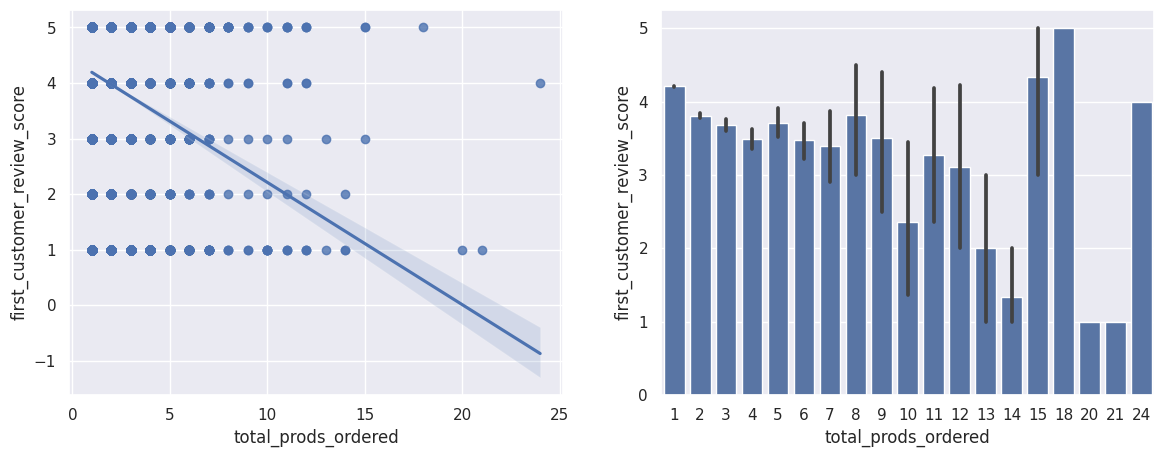

/home/gabriel/OC_DS_Projects/OC_DS_P5/venv/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


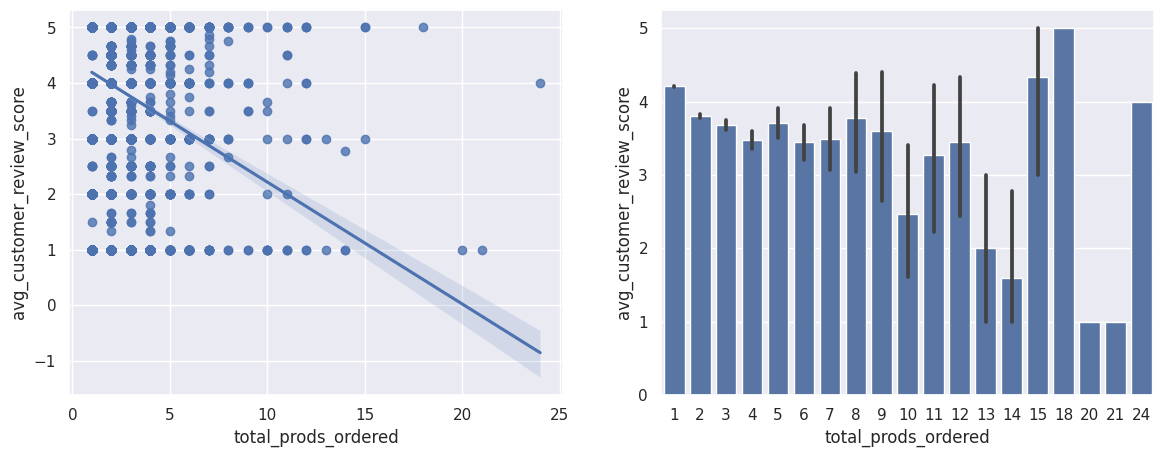

In [14]:
for x, y in [
    ["total_orders", "first_customer_review_score"],
    ["total_orders", "avg_customer_review_score"],
    ["total_prods_ordered", "first_customer_review_score"],
    ["total_prods_ordered", "avg_customer_review_score"],
]:
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs = axs.flatten()

    fig.set_figwidth(14)
    fig.set_figheight(5)
    sns.set(style="darkgrid")
    sns.regplot(
        data=customer_behav_df,
        x=x,
        y=y,
        ax=axs[0],
        color=plt.rcParams["axes.prop_cycle"].by_key()["color"][0],
    )
    sns.barplot(
        data=customer_behav_df,
        x=x,
        y=y,
        ax=axs[1],
        color=plt.rcParams["axes.prop_cycle"].by_key()["color"][0],
    )
    plt.show()


In [44]:
def get_order_timestamps(row):
    row["order_purchase_timestamps"] = sorted(
        orders_df[
            orders_df["customer_id"].isin(
                customers_df.loc[
                    customers_df["customer_unique_id"] == row["customer_unique_id"]
                ]["customer_id"].to_list()
            )
        ]["order_purchase_timestamp"].to_list(),
        reverse=True,
    )

    return row


repeat_customers_df = (
    customer_behav_df.loc[customer_behav_df["total_orders"] > 1]
    .apply(get_order_timestamps, axis=1)
    .reset_index()
    .drop("index", axis=1)
)
repeat_customers_df["order_frequency_seconds"] = repeat_customers_df.apply(
    lambda x: (
        (x["order_purchase_timestamps"][0] - x["order_purchase_timestamps"][-1])
        / (len(x["order_purchase_timestamps"]) - 1)
    ).total_seconds(),
    axis=1,
)

display(repeat_customers_df)


customer_unique_id  total_orders  total_prods_ordered  \
0     4c93744516667ad3b8f1fb645a3116a4             2                    2   
1     1175e95fb47ddff9de6b2b06188f7e0d             2                    2   
2     295c05e81917928d76245e842748184d             2                    2   
3     e9dd12dca17352644a959d9dea133935             2                    2   
4     e079b18794454de9d2be5c12b4392294             2                    6   
...                                ...           ...                  ...   
2796  574e36a816bf7a295404e686062fc0de             2                    3   
2797  76f7d40948174f5cde0fcf8e6147b59d             2                    4   
2798  88fcb680dc8cd2e540010c0750b78242             2                    2   
2799  2dcbfb99d95c7ba6eb992a98627f45b8             2                    3   
2800  da29b8a3970adddb9ed2dc8a492065af             2                    2   

      first_customer_review_score  avg_customer_review_score  \
0                             5.0                        5.0   
1                             5.0                        5.0   
2                             3.0                        4.0   
3                             3.0                        4.0   
4                             5.0                        5.0   
...                           ...                        ...   
2796                          4.0                        4.5   
2797                          2.0                        2.0   
2798                          4.0                        4.0   
2799                          1.0                        1.0   
2800                          4.0                        4.5   

                       order_purchase_timestamps  order_frequency_seconds  
0     [2017-10-15 12:44:13, 2017-09-14 18:14:31]                2658582.0  
1     [2018-01-18 12:35:45, 2018-01-18 12:35:44]                      1.0  
2     [2018-06-06 11:59:53, 2018-03-07 15:57:14]                7848159.0  
3     [2018-04-18 09:42:53, 2018-03-05 18:12:15]                3771038.0  
4     [2017-06-14 18:52:29, 2017-06-14 18:31:54]                   1235.0  
...                                          ...                      ...  
2796  [2018-04-26 18:07:40, 2017-06-06 17:00:18]               27997642.0  
2797  [2018-04-29 22:59:41, 2017-12-30 00:06:41]               10450380.0  
2798  [2018-01-19 08:02:06, 2017-04-24 10:53:12]               23317734.0  
2799  [2017-12-03 20:37:09, 2017-11-28 01:16:27]                 501642.0  
2800  [2017-09-18 12:37:24, 2017-06-20 12:40:40]                7775804.0  

[2801 rows x 7 columns]

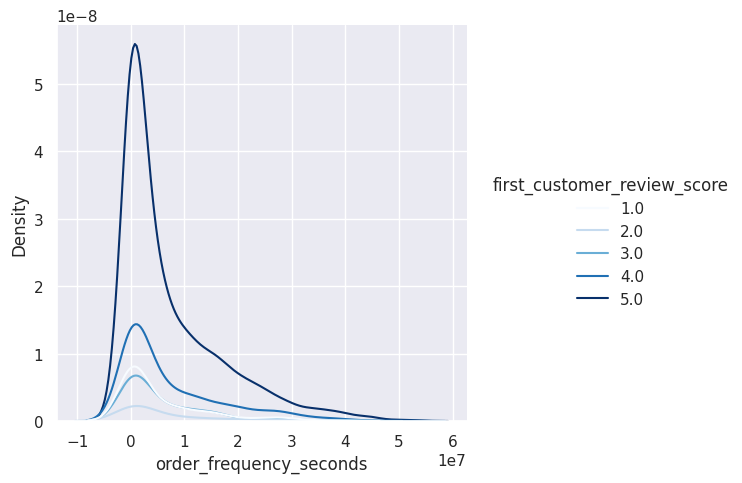

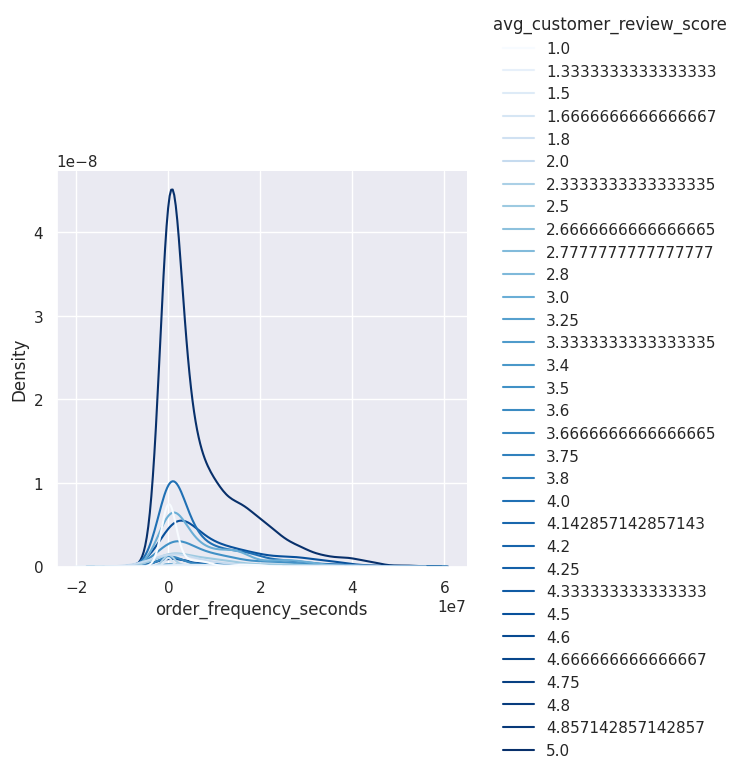

In [92]:
sns.displot(
    data=repeat_customers_df,
    x="order_frequency_seconds",
    hue="first_customer_review_score",
    kind="kde",
    palette="Blues",
)
plt.show()
sns.displot(
    data=repeat_customers_df,
    x="order_frequency_seconds",
    hue="avg_customer_review_score",
    kind="kde",
    palette="Blues",
    warn_singular=False,
)
plt.show()
